 Logistic Regression Implementation

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier,BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
%matplotlib inline

**Preprocessing Step**

In [2]:
df = pd.read_csv("./winequality-red.csv")
print(df.shape) 
df.head(5)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<hr style="height:3px;border:none;color:#333;background-color:#333;" />

### Context:

Now we will make an analysis on the ingredients of the wine and see which ingredient plays the most important role with the quality of wine. Then we will try to make some predictions from the data and compare with the Linear Regression and Logistic Regression to see which model performs better.

<AxesSubplot:xlabel='quality', ylabel='count'>

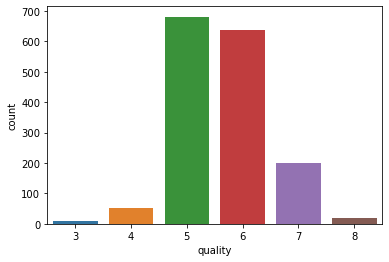

In [3]:
sns.countplot(x=df['quality'], data=df)

### Plotting correlation with respect to quality 'label'

Text(0.5, 1.0, 'Correlation of Wine Analysis with respect to quality')

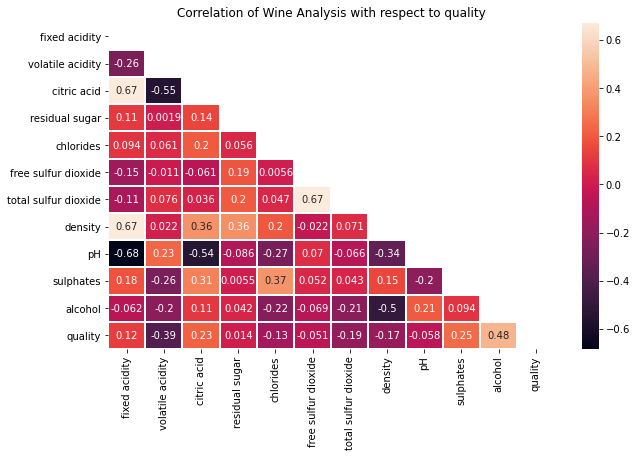

In [4]:
correlation  = df.corr()
mask = np.triu(np.ones_like(correlation , dtype = bool))

plt.figure(figsize = (10,6))
sns.heatmap(correlation , mask = mask , annot = True , linewidth = 1)
plt.title('Correlation of Wine Analysis with respect to quality')

#### Insights from the above figure:

* Alcohol is positively co-realated with the quality of the red wine.
* Alcohol has a week positive co-relation with the pH value.
* Citric acid and density have a strong positive co-relation with the fixed acidity.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

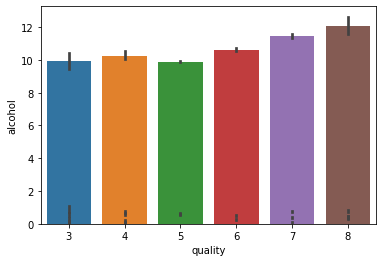

In [5]:
sns.barplot( y = 'volatile acidity', x ='quality' , data = df)
sns.barplot( y = 'chlorides', x ='quality' , data = df)
sns.barplot( y = 'citric acid', x ='quality' , data = df)
sns.barplot( y = 'sulphates', x ='quality' , data = df)
sns.barplot( y = 'alcohol', x ='quality' , data = df)

In [6]:
df['CLASS'] = [1 if x >= 7 else 0 for x in df['quality']]
df.drop('quality' , axis=1 , inplace=True)

print(df['CLASS'].value_counts())

df.head()

0    1382
1     217
Name: CLASS, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,CLASS
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
#########
# Run this section only if you need to resample the data. Otherwise avoid this section.
########

quality_1 = df[df['CLASS'] == 1] 
quality_0 = df[df['CLASS'] == 0]

print(f'Shape of quality 1 : {quality_1.shape}')
print(f'Shape of quality 0 : {quality_0.shape}')

df_quality_1_over = quality_1.sample(len(quality_0) , replace = True)
df_quality_1_over.shape

df = pd.concat([quality_0,df_quality_1_over] , axis = 0) 
df.CLASS.value_counts()
df.head()

In [7]:
# Split data, train logistic regression
X = df.drop(['CLASS'], axis = 1)
y = df['CLASS']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

**Classification techniques**

**1. Logistic Regression**

In [8]:
# Fit model, print coefficients
model1 = LogisticRegression(penalty='none', max_iter=300).fit(Xtrain,ytrain)

print(f"Intercept {model1.intercept_} \nCoefficients: {model1.coef_}")

Intercept [-6.54331048] 
Coefficients: [[ 1.05571490e-01 -4.62654348e+00 -2.66181265e-02  1.39070769e-01
  -7.88730019e+00  5.24442997e-03 -1.28612779e-02 -6.61179011e+00
   2.62792485e-01  3.08768287e+00  9.54782124e-01]]


/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
y_prob1=model1.predict_proba(Xtest)
y_pred1 = model1.predict(Xtest)

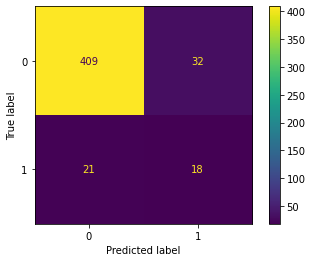

In [11]:
conf1 = confusion_matrix(y_pred1,ytest)
ConfusionMatrixDisplay(confusion_matrix=conf1, display_labels=model1.classes_).plot()
plt.show()

In [12]:
def compute_performance(yhat, y, classes):
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    acc = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)    
    sensitivity = recall
    specificity = tn / (fp + tn)
    f1_score=2*(precision*recall)/(precision+recall)

        
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),"F1-Score:",round(f1_score,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))


In [13]:
compute_performance(y_pred1, ytest, model1.classes_)

tp: 18 tn: 409 fp: 21 fn: 32
Accuracy: 0.89 Recall: 0.36 Precision: 0.462 F1-Score: 0.404 Sensitivity: 0.36 Specificity: 0.951


In [14]:
#Redoing with Regularization
model2 = LogisticRegression(penalty='l2',solver='newton-cg',C=1).fit(Xtrain,ytrain)
print(f"Intercepts: {model2.intercept_} \nCoefficients: {model2.coef_}")

Intercepts: [-13.22230936] 
Coefficients: [[ 0.09637437 -3.12313314  0.36959258  0.09302247 -0.95681683  0.00699904
  -0.01158232 -0.02651814  0.03281981  2.15285839  0.98484154]]


In [15]:
y_prob2=model2.predict_proba(Xtest)
y_pred2 = model2.predict(Xtest)


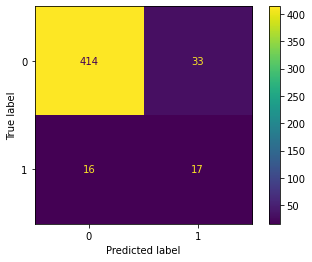

In [17]:
conf2 = confusion_matrix(y_pred2,ytest)
ConfusionMatrixDisplay(confusion_matrix=conf2, display_labels=model2.classes_).plot()
plt.show()

In [18]:
compute_performance(y_pred2, ytest, model2.classes_)

tp: 17 tn: 414 fp: 16 fn: 33
Accuracy: 0.898 Recall: 0.34 Precision: 0.515 F1-Score: 0.41 Sensitivity: 0.34 Specificity: 0.963


In [19]:
model3 = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(Xtrain,ytrain)
print(f"Intercepts: {model3.intercept_} \nCoefficients: {model3.coef_}")

Intercepts: [-2.13119775] 
Coefficients: [[-0.0355246  -4.50906948  0.          0.10398835 -1.65597099  0.00600696
  -0.01349823 -2.45800696 -1.64397307  2.10699521  0.88449161]]


In [20]:
y_prob3=model3.predict_proba(Xtest)
y_pred3 = model3.predict(Xtest)

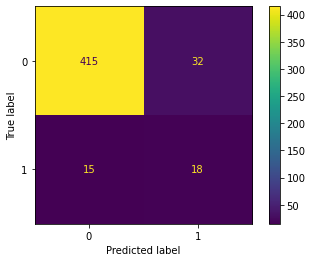

In [22]:
conf3 = confusion_matrix(y_pred3,ytest)
ConfusionMatrixDisplay(confusion_matrix=conf3, display_labels=model3.classes_).plot()
plt.show()

In [23]:
compute_performance(y_pred3, ytest, model3.classes_)

tp: 18 tn: 415 fp: 15 fn: 32
Accuracy: 0.902 Recall: 0.36 Precision: 0.545 F1-Score: 0.434 Sensitivity: 0.36 Specificity: 0.965


AUC1: 0.8566046511627908| AUC2: 0.8653953488372093| AUC3: 0.8534418604651163


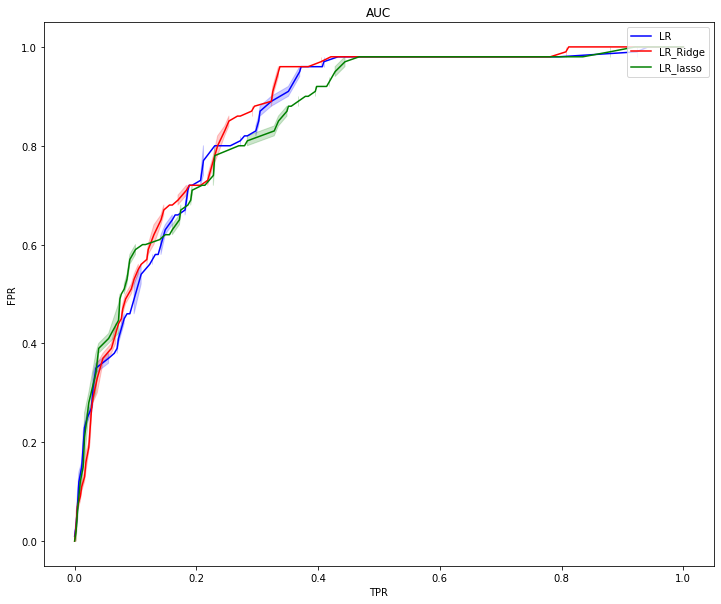

In [24]:
fpr1, tpr1, _ = roc_curve(ytest, y_prob1[:,1])
fpr2, tpr2, _ = roc_curve(ytest, y_prob2[:,1])
fpr3, tpr3, _ = roc_curve(ytest, y_prob3[:,1])

# Plot all of the ROC curves
plt.figure(figsize=(12,10))
plt.title("AUC")
ax = sns.lineplot(x=fpr1, y=tpr1, color="blue",label="LR")
ax = sns.lineplot(x=fpr2, y=tpr2, color="red", label="LR_Ridge")
ax = sns.lineplot(x=fpr3, y=tpr3, color="green",label="LR_lasso")
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.legend(loc="upper right")
# Determine AUC for each of the ROC curves 
print(f"AUC1: {auc(fpr1, tpr1)}| AUC2: {auc(fpr2, tpr2)}| AUC3: {auc(fpr3, tpr3)}")

### For the classification of we will use MLP classifier of Neural Networks using sklearn

In [25]:
features = df.iloc[:,:-1]
label = df['CLASS']

In [26]:
print(f'Length of x_train : {Xtrain.shape}')
print(f'Length of y_train : {ytrain.shape}')
print(f'Length of x_test : {Xtest.shape}')
print(f'Length of y_test : {ytest.shape}')

Length of x_train : (1119, 11)
Length of y_train : (1119,)
Length of x_test : (480, 11)
Length of y_test : (480,)


**2. MLP classification**

In [27]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic',
                       solver='adam', alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.001)

mlp_classifier.fit(Xtrain,ytrain)

mlp_classifier.score(Xtest,ytest)

y_pred_mlp = mlp_classifier.predict(Xtest)
y_prob_mlp=mlp_classifier.predict_proba(Xtest)

/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
from sklearn.metrics import confusion_matrix , classification_report  

report = classification_report(ytest,y_pred_mlp)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       430
           1       0.00      0.00      0.00        50

    accuracy                           0.90       480
   macro avg       0.45      0.50      0.47       480
weighted avg       0.80      0.90      0.85       480



/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Text(24.0, 0.5, 'Actual Labels')

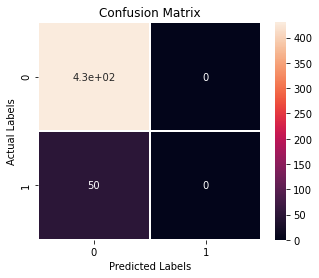

In [29]:
cm = confusion_matrix(ytest,y_pred_mlp) 
plt.figure(figsize = (5,4))
sns.heatmap(cm , annot = True ,linewidth = 1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In the next step we will add decision tree.

**The first step is Exploratory data analysis so we check data distribution**

/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anuragbhattacharjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

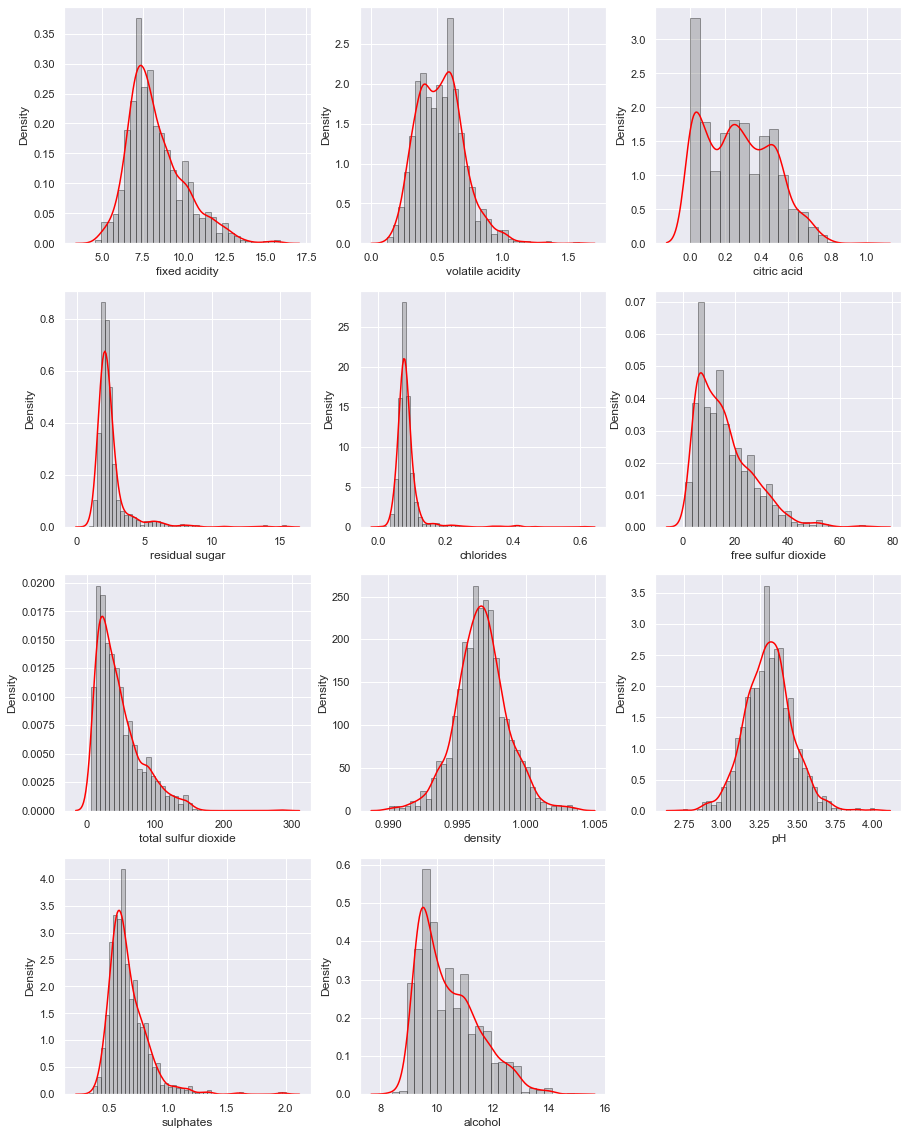

In [30]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()  

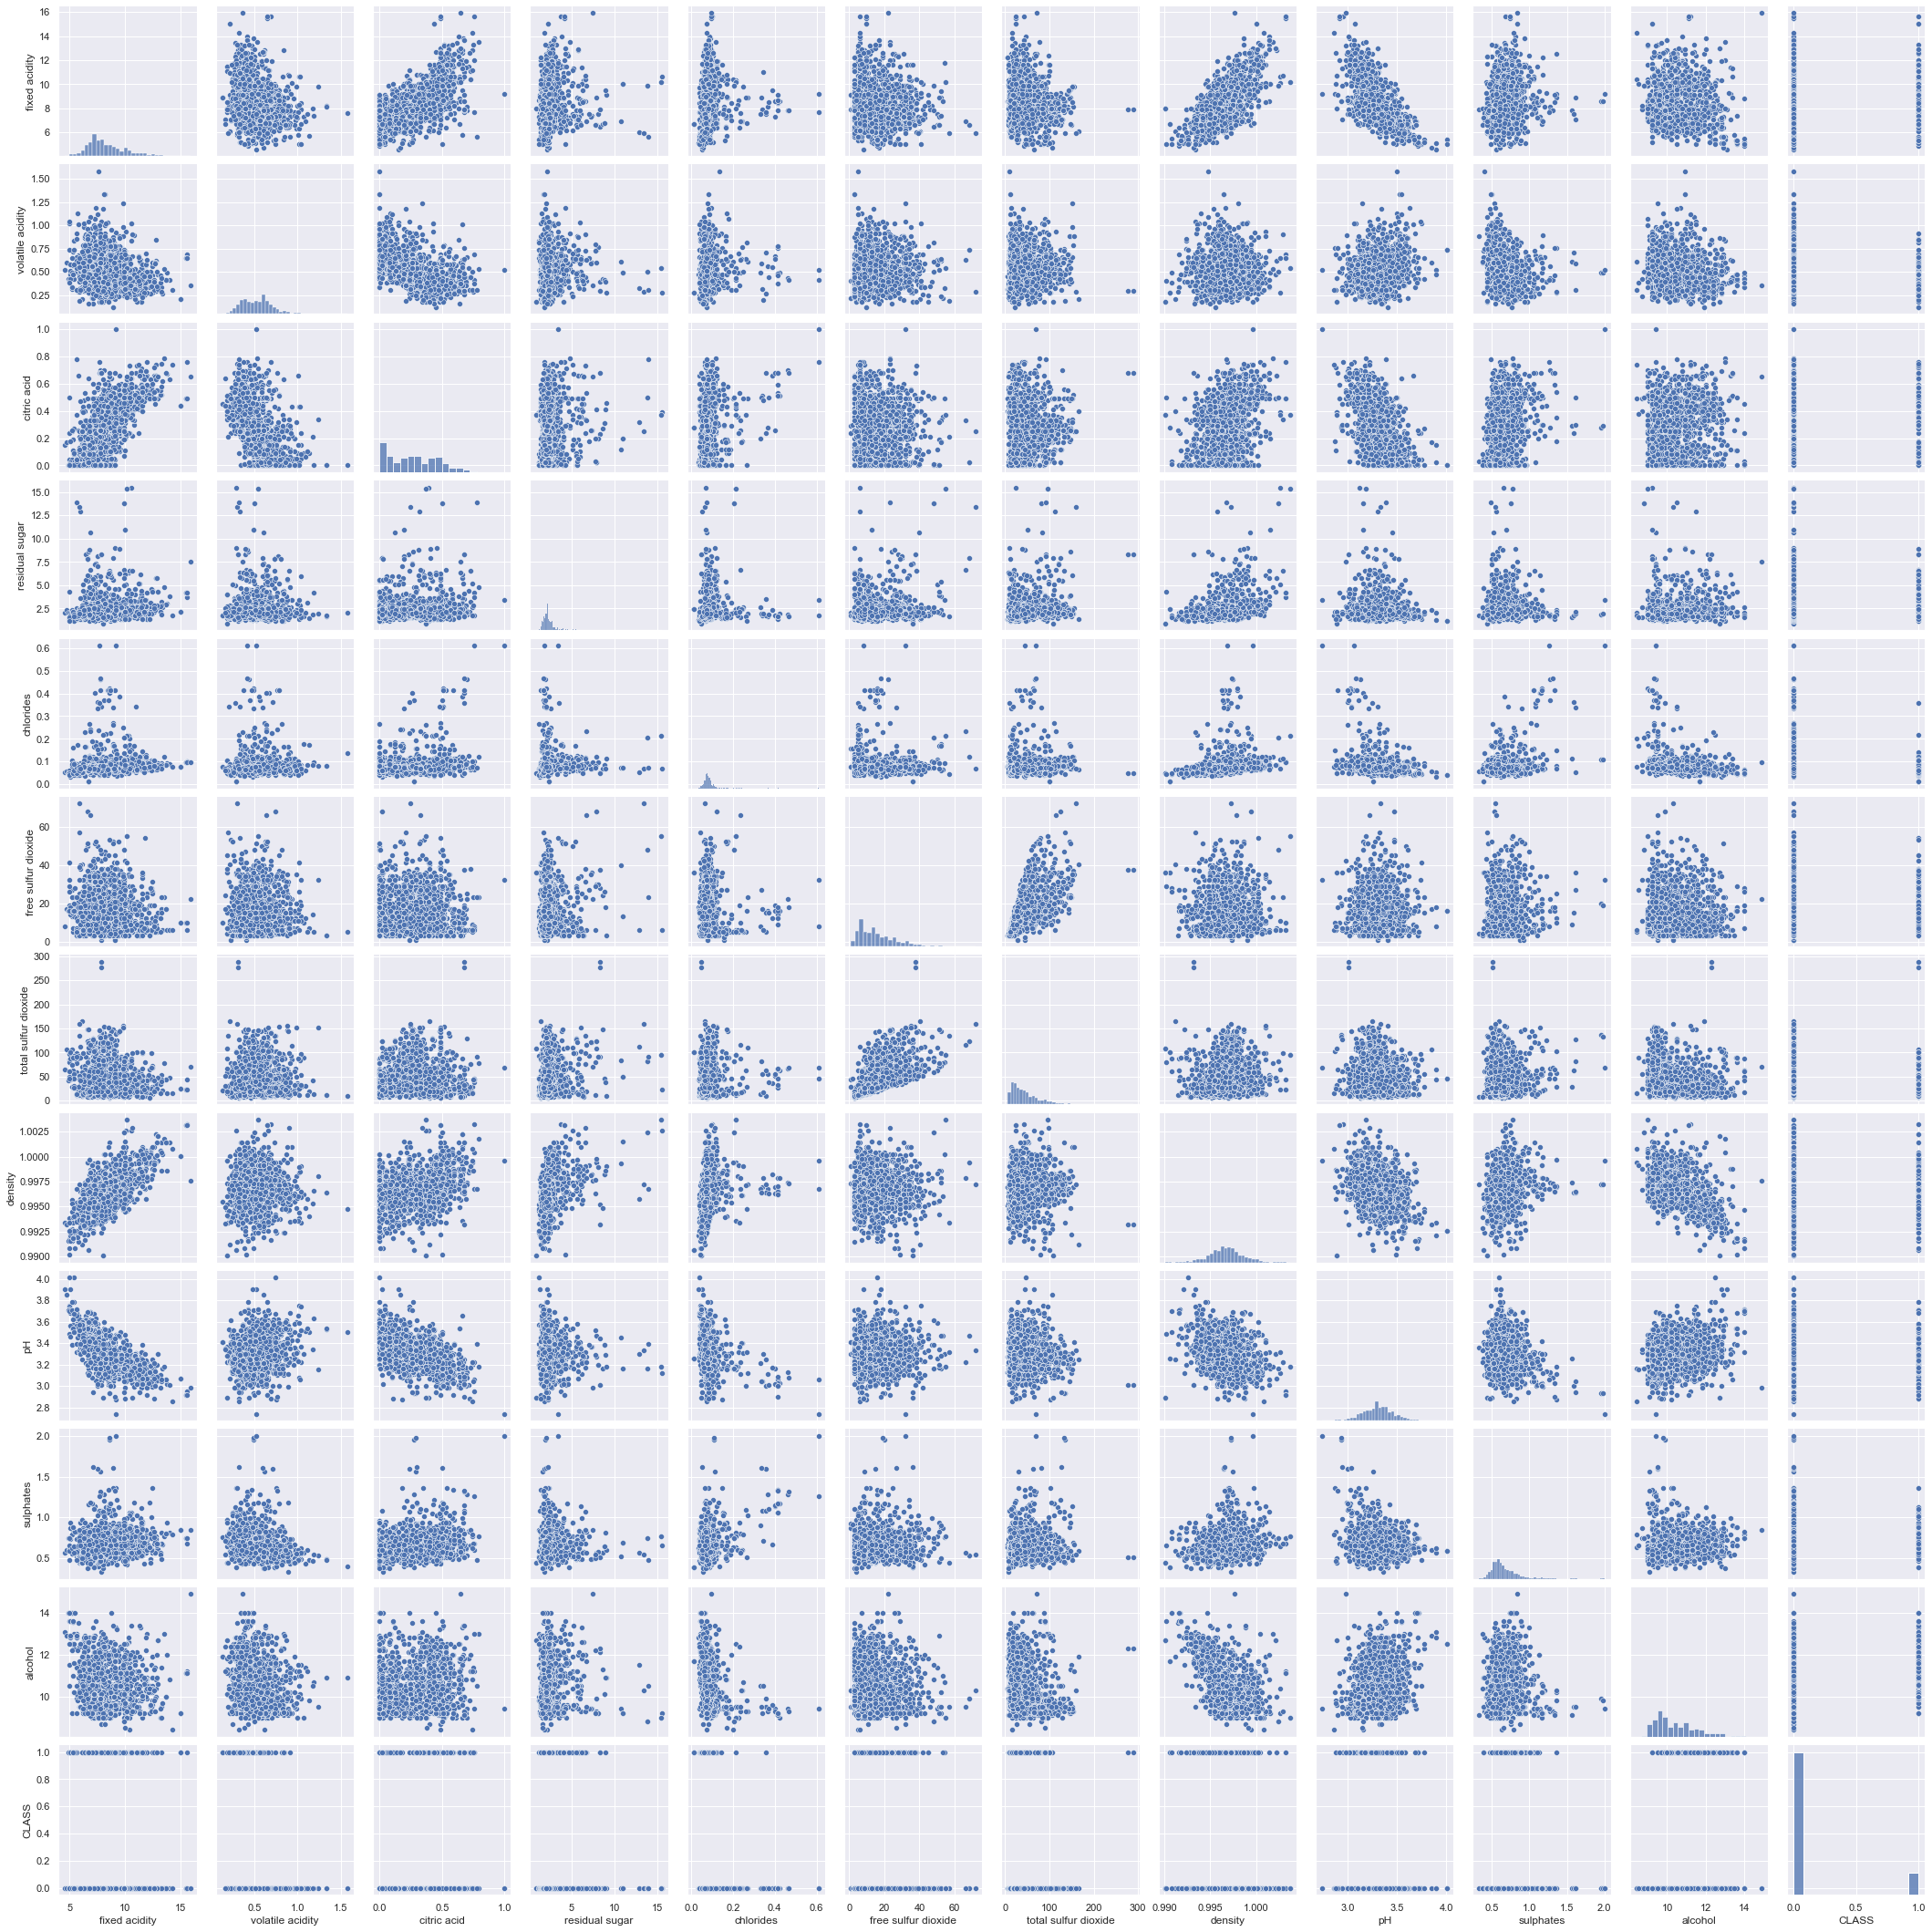

In [31]:
sns.pairplot(df)
plt.show()

A linear relationship can be observed for :

1.fixed acidity vs density
2.fixed acidity vs pH
3.total sulfur dioxide vs free sulfur dioxide

**3.Decision Tree Classifier--> A decision tree is a map of the possible outcomes of a series of related choices.**

In [32]:
# Create a Decision Tree
DT = DecisionTreeClassifier(max_depth=10)
# Fit the training data
DT.fit(Xtrain,ytrain)
# Predict based on test data
y_pred_dt = DT.predict(Xtest)
y_prob_dt=DT.predict_proba(Xtest)
# Calculate Accuracy
compute_performance(y_pred_dt,ytest,DT.classes_)

tp: 32 tn: 393 fp: 37 fn: 18
Accuracy: 0.885 Recall: 0.64 Precision: 0.464 F1-Score: 0.538 Sensitivity: 0.64 Specificity: 0.914


In [33]:
# Create and print confusion matrix
confusion_matrix(ytest,y_pred_dt)

array([[393,  37],
       [ 18,  32]])

**4.Bagging classifer -> (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set).**

In [34]:
BAG = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
BAG.fit(Xtrain, ytrain)
y_pred_bag = BAG.predict(Xtest)
y_prob_bag=BAG.predict_proba(Xtest)
print('accuracy on the test set: ', metrics.accuracy_score(ytest, y_pred_bag))
compute_performance(y_pred_bag,ytest,BAG.classes_)

accuracy on the test set:  0.9166666666666666
tp: 27 tn: 413 fp: 17 fn: 23
Accuracy: 0.917 Recall: 0.54 Precision: 0.614 F1-Score: 0.574 Sensitivity: 0.54 Specificity: 0.96


**5. Support Vector Machine Classifier->  SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.**

In [43]:
Svc = SVC(kernel='linear', probability=True)
Svc.fit(Xtrain, ytrain)
y_pred_svc = Svc.predict(Xtest)
y_prob_svc=Svc.predict_proba(Xtest)

print(metrics.accuracy_score(ytest, y_pred_svc))
compute_performance(y_pred_svc,ytest,Svc.classes_)


0.8958333333333334
tp: 0 tn: 430 fp: 0 fn: 50


ZeroDivisionError: division by zero

**6. Kernel estimation -> k-nearest neighbor - K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure.**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(Xtrain,ytrain)
y_pred_KNN = KNN.predict(Xtest)
y_prob_KNN=KNN.predict_proba(Xtest)
compute_performance(y_pred_KNN,ytest,KNN.classes_)

tp: 9 tn: 419 fp: 11 fn: 41
Accuracy: 0.892 Recall: 0.18 Precision: 0.45 F1-Score: 0.257 Sensitivity: 0.18 Specificity: 0.974


**7. Random Forest**

In [45]:
from sklearn.metrics import accuracy_score
RF = RandomForestClassifier().fit(Xtrain,ytrain)
# predict the target on the train dataset
y_pred_rf = RF.predict(Xtest)
y_prob_rf=RF.predict_proba(Xtest)
compute_performance(y_pred_rf,ytest,RF.classes_)

tp: 28 tn: 412 fp: 18 fn: 22
Accuracy: 0.917 Recall: 0.56 Precision: 0.609 F1-Score: 0.583 Sensitivity: 0.56 Specificity: 0.958


**8. SGD**

In [46]:
SGD= SGDClassifier(loss='log',max_iter=1000).fit(Xtrain,ytrain)
y_pred_sg=SGD.predict(Xtest)
y_prob_sg=SGD.predict_proba(Xtest)
compute_performance(y_pred_sg,ytest,SGD.classes_)

tp: 38 tn: 347 fp: 83 fn: 12
Accuracy: 0.802 Recall: 0.76 Precision: 0.314 F1-Score: 0.444 Sensitivity: 0.76 Specificity: 0.807


LR_AUC1: 0.8566046511627908 
 LR_Ridge_AUC2: 0.8653953488372093 
 LR_Lasso_AUC3: 0.8534418604651163 
 DT_AUC3: 0.7919767441860466 
 Bagging_AUC4: 0.8889767441860466 
 SVC_AUC6: 0.8493023255813954 
 KNN_AUC7: 0.8493023255813954 
 RF_AUC8: 0.8493023255813954 
 SGD_AUC9: 0.8493023255813954 
 MLP_AUC10: 0.8493023255813954


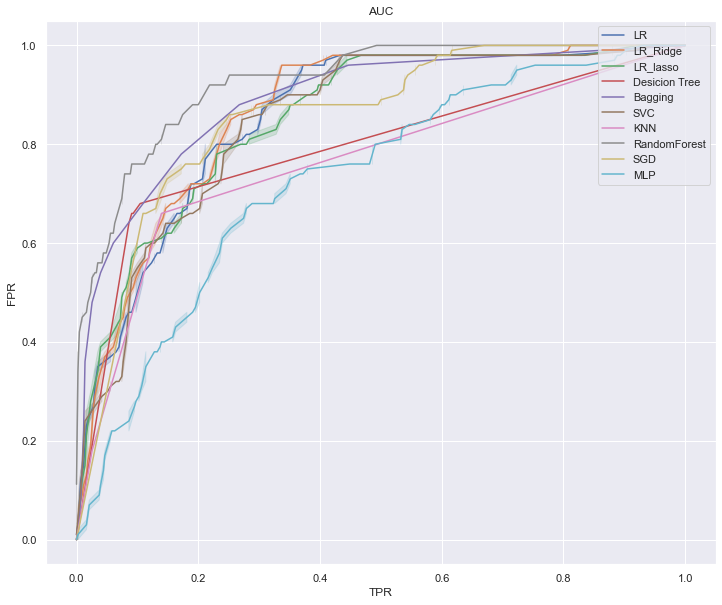

In [47]:
fpr1, tpr1, _ = roc_curve(ytest, y_prob1[:,1])
fpr2, tpr2, _ = roc_curve(ytest, y_prob2[:,1])
fpr3, tpr3, _ = roc_curve(ytest, y_prob3[:,1])

# Plot all of the ROC curves
fpr4, tpr4, _ = roc_curve(ytest, y_prob_dt[:,1])
fpr5, tpr5, _ = roc_curve(ytest, y_prob_bag[:,1])
fpr6, tpr6, _ = roc_curve(ytest, y_prob_svc[:,1])
fpr7, tpr7, _ = roc_curve(ytest, y_prob_KNN[:,1])
fpr8, tpr8, _ = roc_curve(ytest, y_prob_rf[:,1])
fpr9, tpr9, _ = roc_curve(ytest, y_prob_sg[:,1])
fpr10, tpr10, _ = roc_curve(ytest, y_prob_mlp[:,1])
# Plot all of the ROC curves
plt.figure(figsize=(12,10))
plt.title("AUC")
ax = sns.lineplot(x=fpr1, y=tpr1, label="LR")
ax = sns.lineplot(x=fpr2, y=tpr2, label="LR_Ridge")
ax = sns.lineplot(x=fpr3, y=tpr3, label="LR_lasso")
ax = sns.lineplot(x=fpr4, y=tpr4, label="Desicion Tree")
ax = sns.lineplot(x=fpr5, y=tpr5, label="Bagging")
ax = sns.lineplot(x=fpr6, y=tpr6, label="SVC")
ax = sns.lineplot(x=fpr7, y=tpr7, label="KNN")
ax = sns.lineplot(x=fpr8, y=tpr8, label="RandomForest")
ax = sns.lineplot(x=fpr9, y=tpr9, label="SGD")
ax = sns.lineplot(x=fpr10, y=tpr10, label="MLP")
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.legend(loc="upper right")
# Determine AUC for each of the ROC curves 
# Determine AUC for each of the ROC curves 
print(f"LR_AUC1: {auc(fpr1, tpr1)} \n LR_Ridge_AUC2: {auc(fpr2, tpr2)} \n LR_Lasso_AUC3: {auc(fpr3, tpr3)} \n DT_AUC3: {auc(fpr4, tpr4)} \n Bagging_AUC4: {auc(fpr5, tpr5)} \n SVC_AUC6: {auc(fpr6, tpr6)} \n KNN_AUC7: {auc(fpr6, tpr6)} \n RF_AUC8: {auc(fpr6, tpr6)} \n SGD_AUC9: {auc(fpr6, tpr6)} \n MLP_AUC10: {auc(fpr6, tpr6)}")

